In [1]:
import os
os.chdir("..")
import utils

In [2]:
os.getcwd()

'/home/leo/Desktop/f_concurrente'

In [22]:
case = "case1"
fpath = os.path.join(utils.DATADIR, case + '.pkl.bz2')
df = utils.readDf(fpath)

/home/leo/Desktop/f_concurrente/data/case1.pkl.bz2


In [23]:
df = df.drop(columns="repeat")
case_columns = ["mode", "actions", "logIn_threads", "logOut_threads", "apiRequest_threads"]
df = df.groupby(case_columns).mean().reset_index()
df.head(10)

,mode,actions,logIn_threads,logOut_threads,apiRequest_threads,logOut_medianTime,logOut_meanTime,logOut_stdTime,apiRequest_medianTime,apiRequest_meanTime,apiRequest_stdTime,totalTime,logIn_medianTime,logIn_meanTime,logIn_stdTime
0,fine-grained,10,0,0,99,NaN,NaN,NaN,32448.75,1.025769e+06,2.249123e+06,1.015511e+09,NaN,NaN,NaN
1,fine-grained,10,0,0,100,NaN,NaN,NaN,44398.55,9.953216e+05,2.288856e+06,9.953216e+08,NaN,NaN,NaN
2,fine-grained,10,0,50,50,1327.30,4.351657e+05,1.300788e+06,3186.85,3.620550e+05,9.823173e+05,3.986103e+08,NaN,NaN,NaN
3,fine-grained,10,0,99,0,1478.80,2.546562e+05,7.963410e+05,NaN,NaN,NaN,2.521096e+08,NaN,NaN,NaN
4,fine-grained,10,0,100,0,1605.30,3.132739e+05,9.795125e+05,NaN,NaN,NaN,3.132739e+08,NaN,NaN,NaN
5,fine-grained,10,1,1,97,126281.45,1.106587e+06,2.269492e+06,38798.75,1.178371e+06,2.479771e+06,1.168836e+09,292059.50,1475035.76,2.529182e+06
6,fine-grained,10,1,1,98,104883.95,1.032198e+06,1.881162e+06,63726.50,1.105319e+06,2.271183e+06,1.105044e+09,542351.10,1150958.38,1.498201e+06
7,fine-grained,10,1,49,49,1254.60,5.656714e+05,1.632624e+06,1511.25,4.909687e+05,1.346131e+06,5.253113e+08,35224.15,755756.96,1.555336e+06
8,fine-grained,10,1,97,1,1717.85,4.415119e+05,1.327021e+06,12149.05,5.783271e+05,1.269031e+06,4.380211e+08,15735.60,397122.15,9.243675e+05
9,fine-grained,10,1,98,1,1422.65,5.709899e+05,1.631261e+06,22954.20,7.242393e+05,1.596957e+06,5.732930e+08,49304.85,648052.58,1.388515e+06


<Axes: xlabel='logOut_threads', ylabel='logOut_medianTime'>

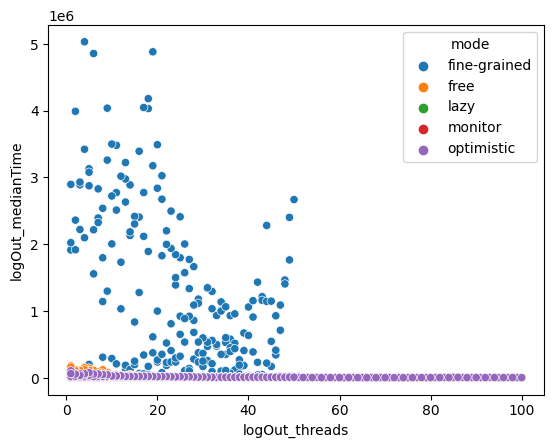

In [24]:
import seaborn as sns
df_drop_dup = df[["logOut_medianTime", "logOut_threads", "mode"]].drop_duplicates()
sns.scatterplot(df_drop_dup, y="logOut_medianTime", x="logOut_threads", hue="mode")